In [37]:
import pandas as pd
import seaborn as sns


In [5]:
insurance_dataset=pd.read_csv("./insurance.csv")

In [6]:
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurance_dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [16]:
insurance_dataset.shape

(1338, 7)

In [19]:
insurance_dataset['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [23]:
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True) #inplace=True

C:\Users\LAKSHAN\AppData\Local\Temp\ipykernel_6240\3929040289.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True) #inplace=True


In [26]:
insurance_dataset.replace({'region':{'southwest':0,'southeast':1,'northwest':1,'northeast':1}},inplace=True) #inplace=True
insurance_dataset.replace({'smoker':{'no':0,'yes':1}},inplace=True)

C:\Users\LAKSHAN\AppData\Local\Temp\ipykernel_6240\3232475863.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'no':0,'yes':1}},inplace=True)


In [27]:
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


Buil Model

In [31]:

training_data=insurance_dataset[['age','sex','bmi','children','smoker','region','charges']]
training_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [77]:
X=insurance_dataset.drop(columns='charges')

Y=insurance_dataset['charges'].round()
X



,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,1
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [78]:
insurance_dataset.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,-0.010016,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.004184,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.006205,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.021914,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.036945,0.787251
region,-0.010016,-0.004184,0.006205,-0.021914,0.036945,1.000000,0.043210
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.043210,1.000000


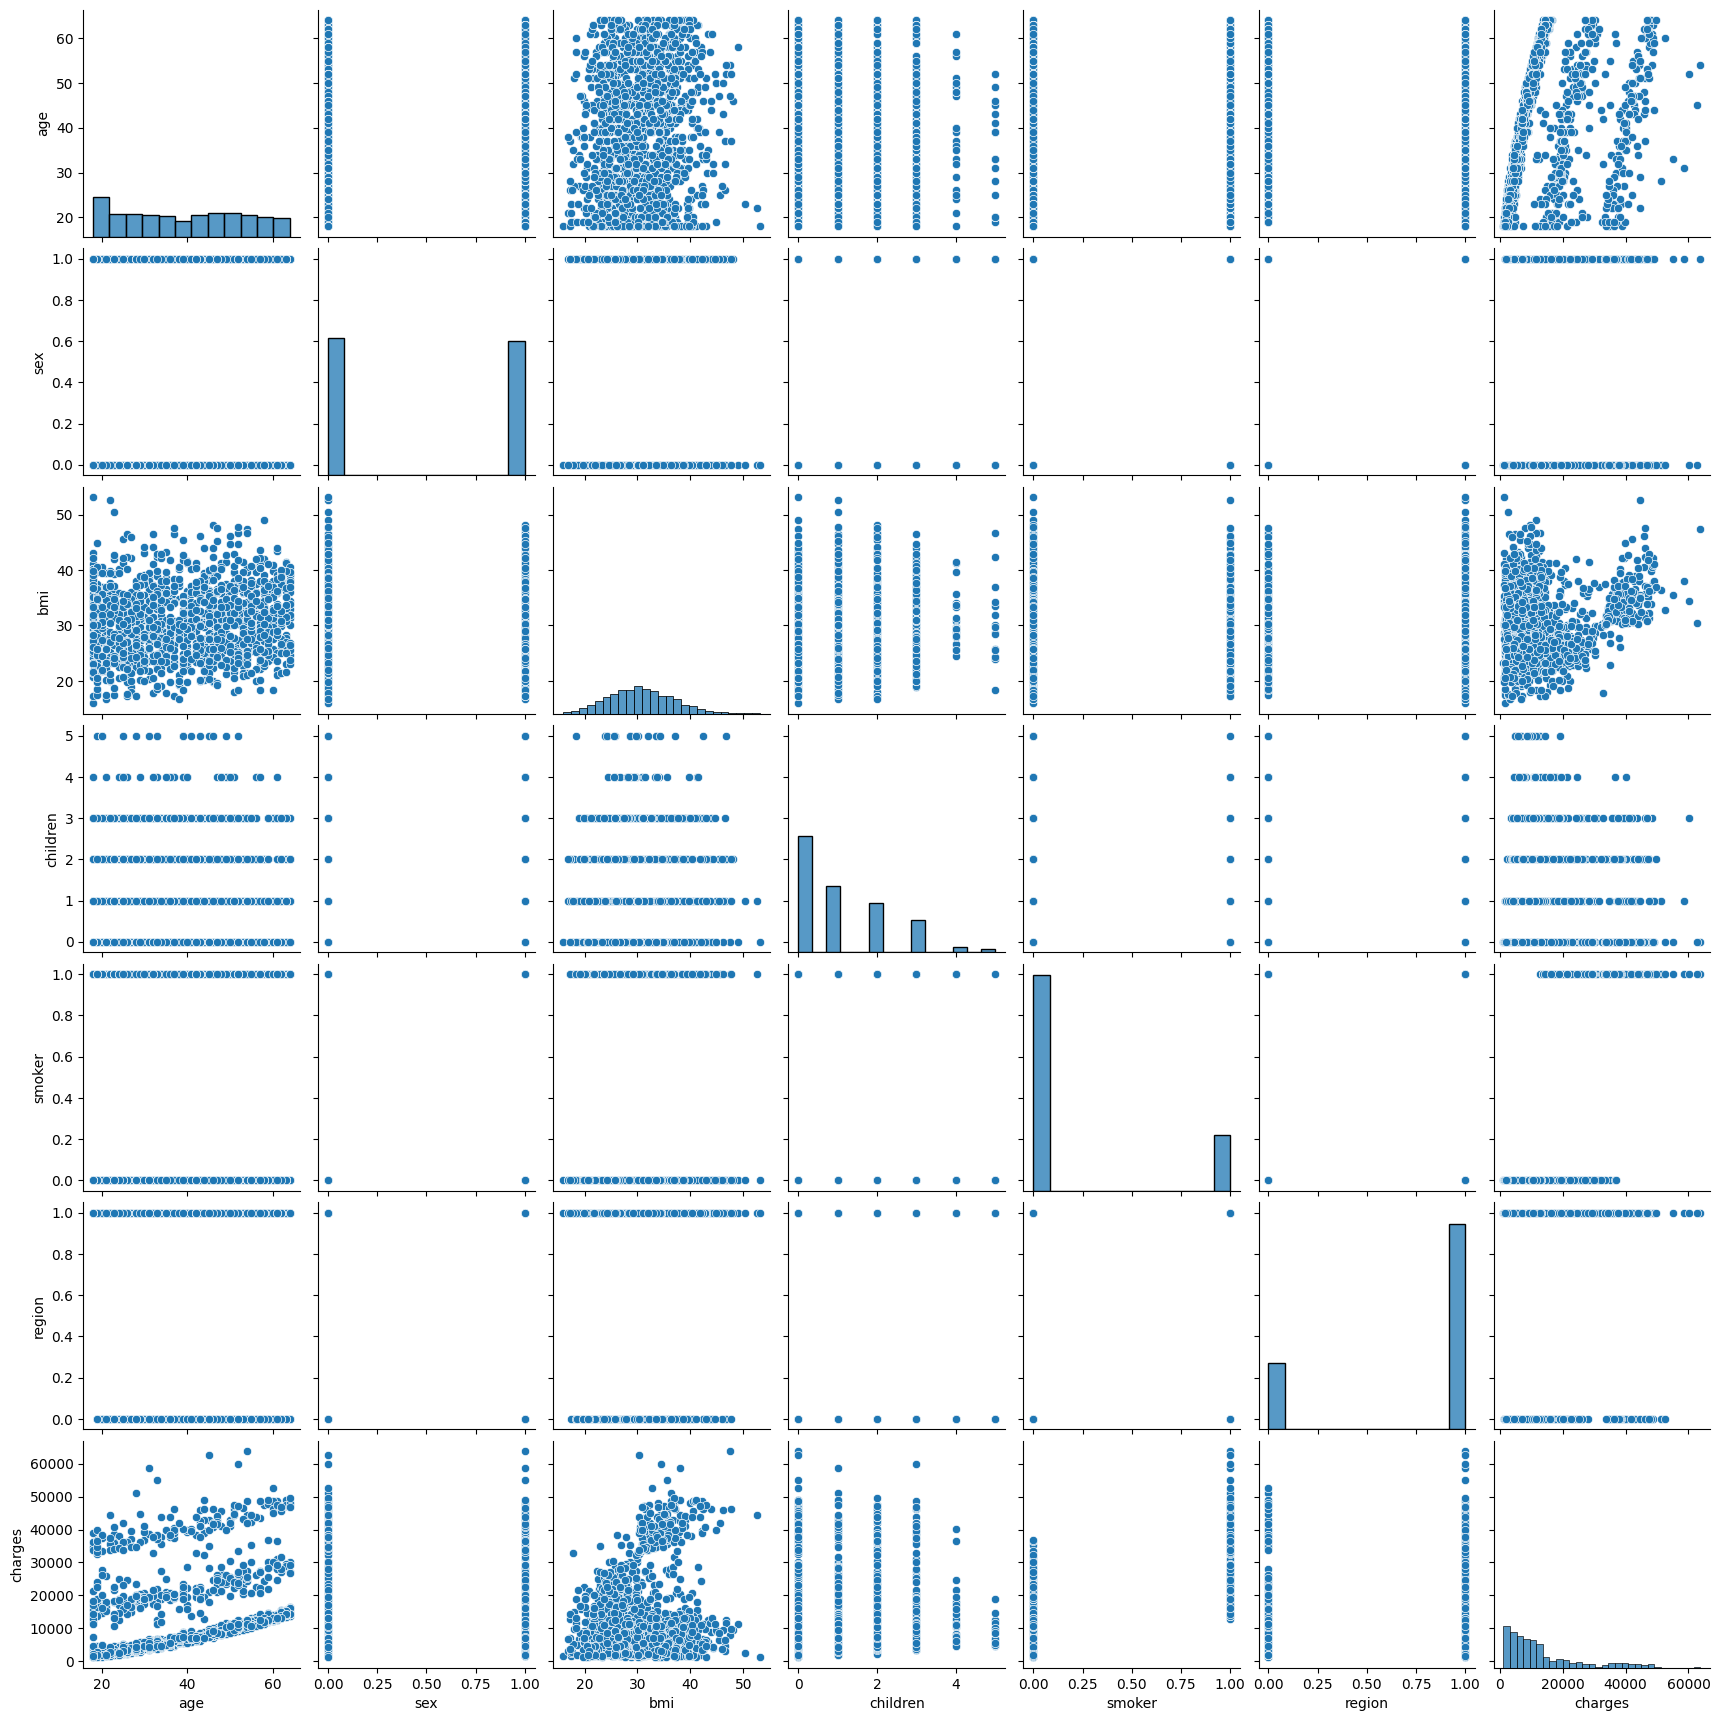

In [79]:
sns.pairplot(insurance_dataset,x_vars=['age','sex','bmi','children','smoker','region','charges'],y_vars=['age','sex','bmi','children','smoker','region','charges'])

In [80]:
#Train,Test Split
from sklearn.model_selection import train_test_split
X_Train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2)


In [81]:
import keras
from keras import layers

In [110]:
model=keras.models.Sequential(
    [
        layers.Dense(units=1,input_shape=(6,))
    ]
)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.9),
              loss=keras.losses.mean_squared_error,
              metrics=['mae'])






c:\Users\LAKSHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [112]:
history=model.fit(X_Train,Y_train,batch_size=32,epochs=1000,validation_split=0.2)

Epoch 1/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 300736192.0000 - mae: 12772.8027 - val_loss: 313892320.0000 - val_mae: 12373.6787
Epoch 2/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 265921344.0000 - mae: 11319.0869 - val_loss: 272254528.0000 - val_mae: 10818.8037
Epoch 3/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 209417744.0000 - mae: 9175.8633 - val_loss: 239949760.0000 - val_mae: 9656.6963
Epoch 4/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 169506464.0000 - mae: 7768.5645 - val_loss: 213763632.0000 - val_mae: 8773.7227
Epoch 5/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 160701120.0000 - mae: 7268.6851 - val_loss: 194145952.0000 - val_mae: 8245.3691
Epoch 6/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152013072.0000 - mae: 7156.0137 - val_loss: 178871744.0000 - val_mae: 7968.8643
Epoch 7/1000
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144549504.0000 - mae: 7067.5405 - val_loss: 167957360.0000 - val_mae: 7893.6377
Epoch 8/1000
27/

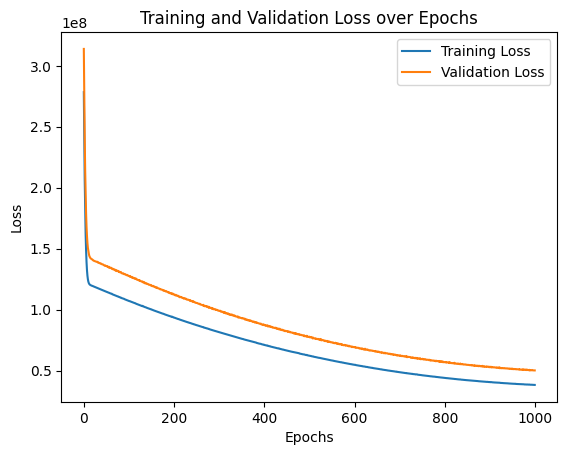

In [113]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()